## Analysis of signal propagation in a time-lapse experiment

In [1]:
import os
from glob import glob
import tqdm
from math import ceil

import numpy as np
import pandas as pd
from scipy.spatial.distance import cdist
import numba
import skimage.io as io

import h5py
import cv2

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
%matplotlib inline

In [320]:
import holoviews as hv
hv.extension("matplotlib")

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

In [3]:
import colorcet as cc
ceiling = np.vectorize(ceil)
sample_cycle = lambda cycle, size: hv.Cycle(
    [cycle[i] for i in ceiling(np.linspace(0, len(cycle) - 1, size))]
)

In [4]:
import bebi103
import bokeh_catplot
import bokeh.io
bokeh.io.output_notebook()

C:\Users\Pranav\Anaconda3\lib\site-packages\bebi103\viz.py:37: UserWarning: DataShader import failed with error "No module named 'datashader.bokeh_ext'".
Features requiring DataShader will not work and you will get exceptions.
  Features requiring DataShader will not work and you will get exceptions."""
C:\Users\Pranav\Anaconda3\lib\site-packages\bebi103\stan.py:36: UserWarning: Both pystan and cmdstanpy are importable in this environment. As per the cmdstanpy documentation, this is not advised.
  "Both pystan and cmdstanpy are importable in this environment. As per the cmdstanpy documentation, this is not advised."


Loading BokehJS ...

In [5]:
%load_ext blackcellmagic

INFO:blib2to3.pgen2.driver:Generating grammar tables from C:\Users\Pranav\Anaconda3\lib\site-packages\blib2to3\Grammar.txt
INFO:blib2to3.pgen2.driver:Writing grammar tables to C:\Users\Pranav\AppData\Local\black\black\Cache\19.10b0\Grammar3.7.7.final.0.pickle
INFO:blib2to3.pgen2.driver:Writing failed: [Errno 2] No such file or directory: 'C:\\Users\\Pranav\\AppData\\Local\\black\\black\\Cache\\19.10b0\\tmpeupw26n7'
INFO:blib2to3.pgen2.driver:Generating grammar tables from C:\Users\Pranav\Anaconda3\lib\site-packages\blib2to3\PatternGrammar.txt
INFO:blib2to3.pgen2.driver:Writing grammar tables to C:\Users\Pranav\AppData\Local\black\black\Cache\19.10b0\PatternGrammar3.7.7.final.0.pickle
INFO:blib2to3.pgen2.driver:Writing failed: [Errno 2] No such file or directory: 'C:\\Users\\Pranav\\AppData\\Local\\black\\black\\Cache\\19.10b0\\tmp98ra_5hi'


<hr>

In [6]:
def plot_imagegrid(
    images,
    ncols,
    plotsize,
    cmap="gray",
    titles=None,
    axes_pad=0.1,
    fig=None,
    subplot=111,
    vmin=0,
    vmax=255,
):

    nplots = len(images)
    nrows = -(-nplots // ncols)  # Does ceiling division

    if fig is None:
        figsize = (nrows * plotsize, ncols * plotsize)
        fig = plt.figure(figsize=figsize)

    grid = ImageGrid(fig, 111, nrows_ncols=(nrows, ncols), axes_pad=axes_pad,)

    if titles is None:
        titles = [None] * nplots

    for ax, im, title in zip(grid, images, titles):
        ax.imshow(im, cmap, vmin=vmin, vmax=vmax)
        ax.set_title(title)

In [7]:
def activated_masks(imstack, thresh, blur_ksize, skip=1, roi=None, dtype=np.uint8):
    """"""
    ims = imstack[::skip]
    masks = np.empty_like(ims, dtype=dtype)
    for i, im in enumerate(ims):
        
        # Filter noise
        blur = cv2.medianBlur(im, blur_ksize, 0)
        
        # Construct mask from threshold
        ret, mask = cv2.threshold(blur, thresh, 255, 0)
        
        assert ret, "Thresholding failed"
        masks[i] = mask
    
    if roi is not None:
        masks = np.multiply(roi, masks)
    
    return masks

<hr>

In [121]:
data_dir = "E:/transceiver_project/20200715_time_lapse_propagation/time_lapse_20x/"

In [122]:
# Read in ROIs and indices of center cells
roi_df = pd.read_csv("../transceiver_timelapse_ROIs.csv", index_col=0)
ctr_df = pd.read_csv("../transceiver_timelapse_centers.csv", index_col=0)

In [123]:
metadata = roi_df.merge(ctr_df)
metadata.head(10)

roi            x            y    video  center_x_idx  center_y_idx
0    0   244.953096   587.362500   2500_A          1012           671
1    0   284.577861   994.162500   2500_A          1012           671
2    0   335.009381  1436.962500   2500_A          1012           671
3    0  1556.172608  1439.362491   2500_A          1012           671
4    0  1916.397749  1048.162500   2500_A          1012           671
5    0  1912.795497   325.762427   2500_A          1012           671
6    0  1628.217636     6.562463   2500_A          1012           671
7    0   183.714822     6.562463   2500_A          1012           671
8    0   180.112570   143.362463   2500_A          1012           671
9    1  1768.705441   574.162427  10000_B          1084           725

In [124]:
vids = np.unique(metadata.video.values)

I decided that I should drop the first 24hrs of growth from teh movie for at least 2 reasons:

1) The background fluorescence at these time-points is much higher than at later time-points, leading to difficulties with background subtraction and signal thresholding/quantification.

2) We observed with velocity measurements that cell velocity also demonstrates aberrant behavior in the first 24 hours of growth. The reasons for this are not known but assumed to be due to the cells adjusting to the environment.

How can we measure area growth even when the activated area touches the ROI boundary?
- Split up each ROI into sectors, like sectors of a circle. 
- Get the convex hull of the activated cells using the mask.
- For each sector, record area and whether any mask pixels touch the ROI boundary.

In [231]:
mask_threshs = [
    41,
    41,
    41,
    42,
    42,
    42,
    41,
    42,
    42,
    40,
    41,
    42,
    42,
    42,
]

In [179]:
vididx = 0
blur_ksize = 65
thresh = 42

vid = vids[vididx]
print(vid)

10000_B


In [180]:
roi_verts = metadata.loc[metadata["video"] == vid, ["x", "y"]].values
ctr_vert  = metadata.loc[metadata["video"] == vid, ["center_y_idx", "center_x_idx"]].values[0]

tiff = glob(os.path.join(data_dir, vid, "*GFP_bgs.TIFF"))[0]
ims = io.imread(tiff)

roi_mask, *_ = bebi103.image.verts_to_roi(roi_verts, ims.shape[1], ims.shape[2])

nt, *imshape = ims.shape
npx = roi_mask.sum()

frames = np.array([24, 48, 72, 96, 120, 144])
samples = [ims[f] for f in frames]

masks = []
masked_ims = []
for s in samples:
    blur = cv2.medianBlur(s, blur_ksize, 0)
    ret, mask = cv2.threshold(blur, thresh, 255, 0)
    mask = mask * roi_mask

    masked_im = cv2.cvtColor(s,cv2.COLOR_GRAY2RGB).copy()
    masked_im[:, :, 1] += mask // 15
    
    masks.append(mask)
    masked_ims.append(masked_im)

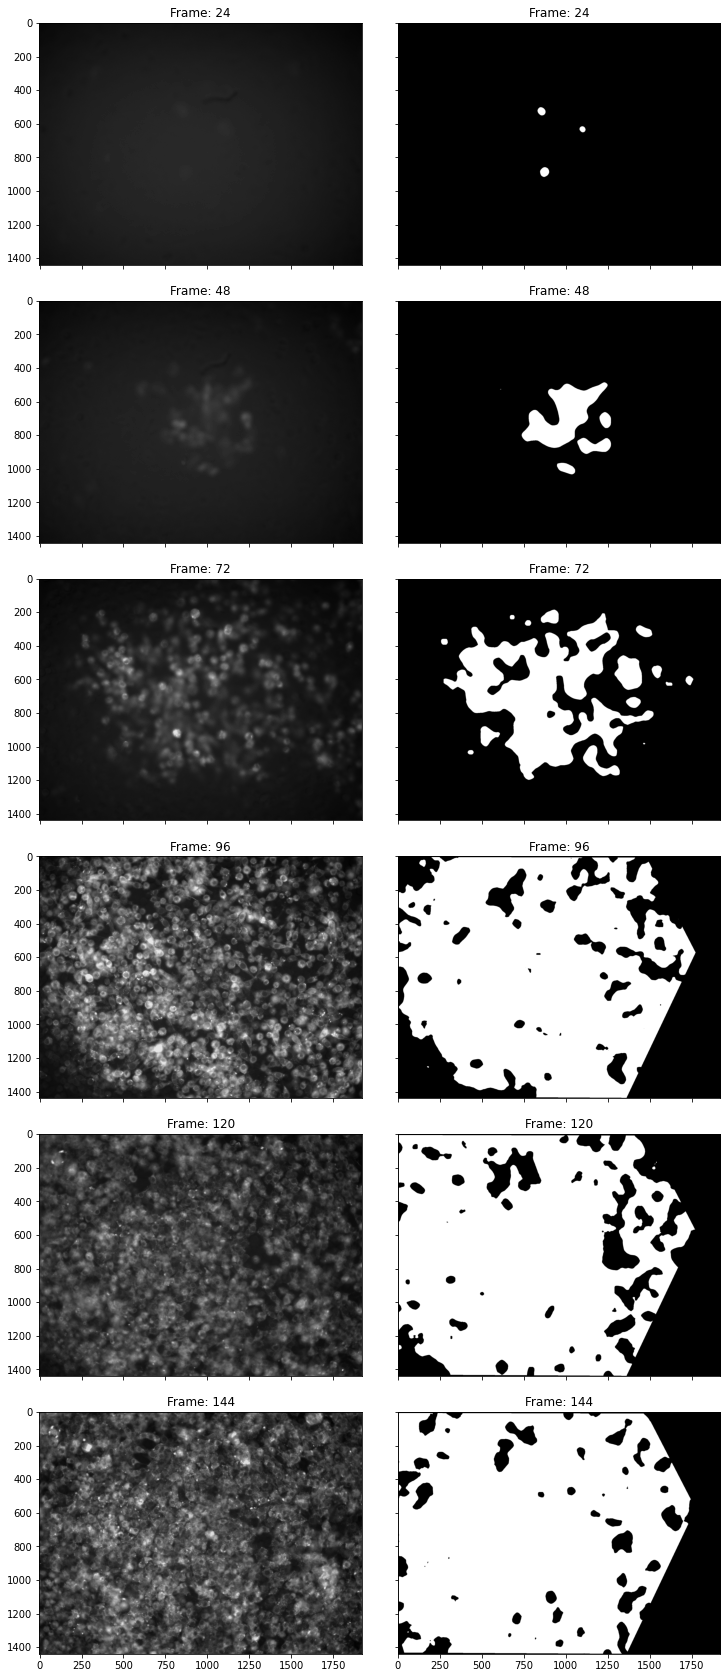

In [181]:
images = [i for j in zip(samples, masks) for i in j]
titles = [f"Frame: {frames[i // 2]}" for i, _ in enumerate(images)]

plot_imagegrid(
    images,
    ncols=2,
    plotsize=15,
    cmap="gray",
    titles=titles,
    axes_pad=0.5,
)

<hr>

In [182]:
# thresh_df = pd.DataFrame({"video": vids, "mask_thresh": [None]*len(vids)})

Now let's apply this to all frames and make an animation to see if it looks as intended

In [183]:
skip  = 1
start = 24
amasks = activated_masks(
    ims[start:], 
    thresh=thresh, 
    blur_ksize=blur_ksize, 
    skip=skip, 
    roi=roi_mask
)

print("thresh:", thresh)
print(f"# frames: {amasks.shape[0]}")

thresh: 42
# frames: 139


In [184]:
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML
%matplotlib inline

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
plt.cla()
ani_list = []
for i, frame in zip(np.arange(start, ims.shape[0], skip), amasks):
    plt.axis("off")
    plt.tight_layout()
    ttl = plt.text(
        0.5,
        1.01,
        f"Frame {i * skip}",
        horizontalalignment="center",
        verticalalignment="bottom",
        transform=ax.transAxes,
    )
    ttl.set_fontsize(20)
    im = plt.imshow(frame, "gray", vmin=0, vmax=255, animated=True)
    ani_list.append([im, ttl])

plt.close()
ani = animation.ArtistAnimation(fig, ani_list, interval=75, blit=False)

# Show the animation
HTML(ani.to_html5_video())

INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
INFO:matplotlib.animation:MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 720x720 -pix_fmt rgba -r 13.333333333333334 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -y 'C:\Users\Pranav\AppData\Local\Temp\tmpj_dvka7c\temp.m4v'


Looks solid. Now we would like to understand how the area of this mask is growing. Ideally we would calculate the growth of the convex hull of activated pixels. However, since we are bounded by an ROI, we might need to be more creative. 

Possible methods:
1) We can treat the center of propagation as the center of a circle and partition the ROI into sectors of equal angle. When a sector "touches" the boundaries of the ROI, we remove it from the area calculation and assume that it grew as much as the other sectors. If all sectors are touching the ROI, return `nan`.

2) We split the ROI into sectors as in (1). For each sector that is not touching the ROI boundary, we find the pixel that is furthest away from the center. We take the average of those distances to be the approximate radius of the disc and calculate the corresponding estimated disc area. Sectors that touch the ROI don't count, and if all sectors touch the ROI, return `nan`. 

Both methods require partitioning the ROI into sectors and finding the boundary pixels of the ROI, so let's start with this.

To get a mask for each sector:
- Get all ROI pixel locations as npx x 2 vector of indices
- subtract center
- `np.arctan2` to calculate angle
- sort by angle
- partition into n_sectors sub-matrices of pixel indices
- Construct n_sectors masks.

In [185]:
# Get pixels in ROI
roi_locs = np.array(roi_mask.nonzero()).T
ims_roi = ims[:, roi_locs.T[0], roi_locs.T[1]]

In [186]:
# Get distances of each pixel from center
displ = roi_locs - ctr_vert
angles = np.arctan2(*displ.T)
sort_order = np.argsort(angles)
unsort_order = np.argsort(sort_order)
locs_sorted = roi_locs[sort_order] 
angles_sorted = angles[sort_order]

In [187]:
# Get boundary indices between each sector
n_sectors = 24
boundary_angles = np.linspace(-np.pi, np.pi, n_sectors + 1)
bound_idx = np.searchsorted(angles_sorted, boundary_angles, side="right")

In [188]:
# Get indices of pixels in sectors
sectors = []
for i in range(n_sectors):
    sec_mask = np.zeros(npx, dtype=np.bool)
    sec_mask[bound_idx[i]:bound_idx[i+1]] = 1
    sec = roi_locs[sec_mask[unsort_order]]
    sectors.append(sec)

# Get mask for each sector
sec_masks = np.zeros((n_sectors, *imshape), dtype=bool)
for i, s in enumerate(sectors):
    sec_masks[i, s.T[0], s.T[1]] = 1

In [189]:
# Make RBG image that colors different sectors
im_sec = np.zeros((*imshape, 3), dtype=int)
for i in range(n_sectors):
    im_sec[:, :, i % 3] += sec_masks[i]
im_sec = (im_sec * 255).astype(np.uint8)

To get a mask of ROI boundary pixels:
- Start with the ROI mask
- Apply `cv2.findCountours`
- Parse output

In [190]:
# Get contours of ROI
cont, _ = cv2.findContours(roi_mask.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
cont = cont[0][:, 0, ::-1]

# Construct mask of ROI contour
cont_mask = np.zeros_like(roi_mask, dtype=bool)
cont_mask[cont.T[0], cont.T[1]] = 1

In [191]:
# Make RBG image that colors contours by sector
im_cont = im_sec * np.repeat(cont_mask[:, :, np.newaxis], 3, axis=2)
im_cont[~cont_mask, :] = 255

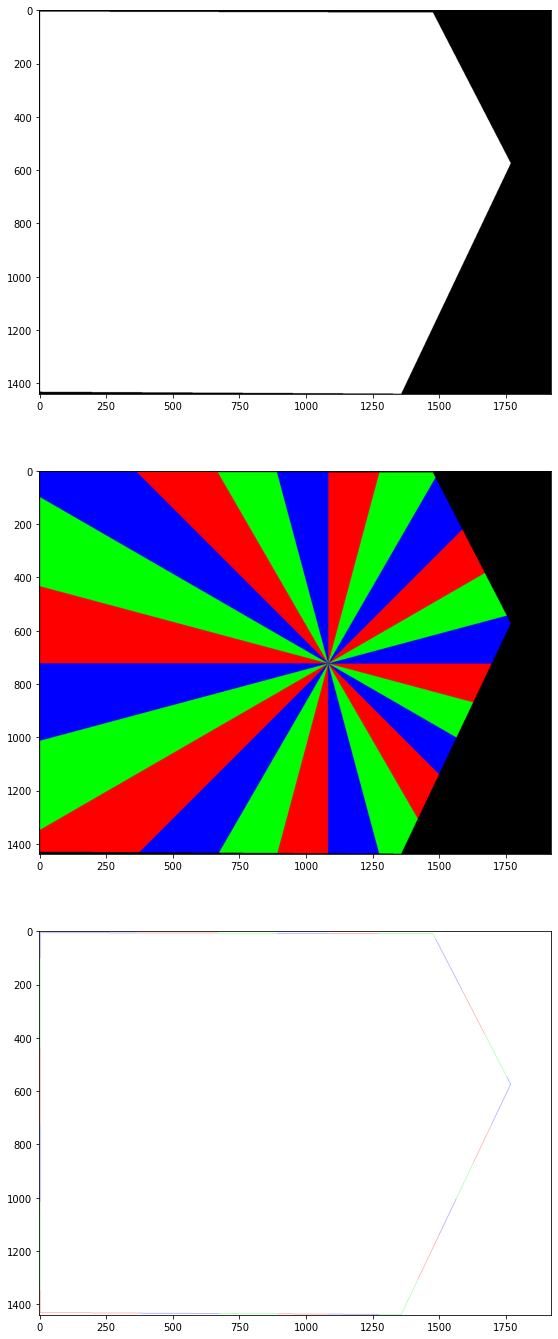

In [192]:
import matplotlib.pyplot as plt
%matplotlib inline

plotsize = 8
nplots = 3
fig, ax = plt.subplots(nplots, figsize=(plotsize * nplots,)*2)

ax[0].imshow(roi_mask, "gray", vmin=0, vmax=1)
ax[1].imshow(im_sec,  "gray", vmin=0, vmax=255)
ax[2].imshow(im_cont, "gray", vmin=0, vmax=255)

For each sector that is not touching the ROI boundary, we find the pixel that is furthest away from the center. We take the average of those distances to be the approximate radius of the disc and calculate the corresponding estimated disc area. Sectors that touch the ROI don't count, and if all sectors touch the ROI, return `nan`. 

In [193]:
iterator = enumerate(amasks)
iterator = tqdm.tqdm(iterator)

sec_radii = np.empty((nt - 24, n_sectors))
# t = 0
for t, am in iterator:
#     print("Time", t)
    for k, sm in enumerate(sec_masks):
        # Get mask of activated pixels in sector
        asm = (sm * am)
        
        # Check if there are no activated pixels
        if not np.any(asm):
            rad = 0
        
        # Check if the mask touches the ROI boundary
        elif np.any(asm * cont_mask):
            rad = np.nan
        
        else:
            # Get indices of activated pixels in sector
            apx = np.array(asm.nonzero()).T
        
            # Get radius (largest distance to center pixel)
            rad = cdist(apx, ctr_vert[np.newaxis, :], metric="euclidean").max()
        
        sec_radii[t, k] = rad
#     t += 1

139it [01:12,  1.91it/s]


In [194]:
sec_radii

array([[  0.        ,   0.        , 330.49357029, ..., 295.832723  ,
          0.        ,   0.        ],
       [348.00574708, 270.22398117, 356.78564994, ..., 358.40200892,
        372.83910739, 398.33905156],
       [  0.        ,   0.        , 326.01380339, ..., 317.05677725,
        303.26556019,   0.        ],
       ...,
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan]])

In [195]:
avg_sec_radii = np.nanmean(sec_radii, axis=1)

C:\Users\Pranav\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.


In [196]:
np.sum(~np.isnan(sec_radii), axis=1)

array([24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24,
       24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24,
       24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 23, 24, 22,
       22, 21, 20, 19, 18, 17, 17, 16, 19, 18, 14, 13, 10, 12,  6,  9,  9,
        6,  6,  5,  4,  4,  4,  4,  4,  3,  1,  1,  1,  0,  1,  0,  0,  1,
        1,  1,  1,  0,  0,  0,  0,  0,  0,  0,  1,  1,  0,  1,  0,  2,  1,
        0,  0,  0,  0,  1,  1,  2,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        1,  1,  1])

In [197]:
hv.Curve(
    data={"time (hrs)": np.arange(24, 163), "average radius (px)": avg_sec_radii},
    kdims=["time (hrs)"],
    vdims=["average radius (px)"],
).opts(
    xlim=(0, 164),
)

:Curve   [time (hrs)]   (average radius (px))

Awesome. Now let's turn all this into a function and run the analysis on all the videos

In [198]:
def ROI_to_contour(ROImask):
    """Returns a mask of the countour pixels of an ROI."""
    # Get contours of ROI
    cont, *_ = cv2.findContours(
        ROImask.astype(np.uint8), 
        cv2.RETR_EXTERNAL, 
        cv2.CHAIN_APPROX_NONE
    )
    cont = cont[0][:, 0, ::-1]

    # Construct mask of ROI contour
    cont_mask = np.zeros_like(ROImask, dtype=bool)
    cont_mask[cont.T[0], cont.T[1]] = 1
    
    return cont_mask

In [199]:
def ROI_to_sectors(ROImask, ctr_vert, n_sectors, imshape):
    """Returns an array of image masks for n_sectors 
         sectors of an ROI, centered at ctr_vert.
    """
    # Get pixels in ROI
    roi_locs = np.array(ROImask.nonzero()).T

    # Get distances of each pixel from center
    displ = roi_locs - ctr_vert

    # Sort pixels by angle
    angles = np.arctan2(*displ.T)
    sort_order = np.argsort(angles)
    unsort_order = np.argsort(sort_order)
    locs_sorted = roi_locs[sort_order] 
    angles_sorted = angles[sort_order]

    # Get boundary indices between each sector
    boundary_angles = np.linspace(-np.pi, np.pi, n_sectors + 1)
    bound_idx = np.searchsorted(angles_sorted, boundary_angles, side="right")

    # Get mask for each sector
    sec_masks = np.zeros((n_sectors, *imshape), dtype=bool)
    for i in range(n_sectors):

        # Get all pixel coordinates
        sec = np.zeros(roi_locs.shape[0], dtype=bool)
        sec[bound_idx[i]:bound_idx[i+1]] = 1
        sec = roi_locs[sec[unsort_order]]

        # Add pixels to mask
        sec_masks[i, sec.T[0], sec.T[1]] = 1

    return sec_masks

In [200]:
def get_active_radius(am, sm, cont_mask, ctr_vert):
    """"""
    # Get mask of activated pixels in sector
    asm = (sm * am)

    # Check if there are no activated pixels
    if not np.any(asm):
        rad = 0

    # Check if the mask touches the ROI boundary
    elif np.any(asm * cont_mask):
        rad = np.nan

    else:
        # Get indices of activated pixels in sector
        apx = np.array(asm.nonzero()).T

        # Get radius (largest distance to center pixel)
        rad = cdist(apx, ctr_vert[np.newaxis, :], metric="euclidean").max()
        
    return rad

In [201]:
def get_sec_radii(
    amasks, smasks, cont_mask, ctr_vert, nt, start, n_sectors, progress_bar=False
):
    """"""
    # Construct iterator
    iterator = range(amasks.shape[0])
    if progress_bar:
        iterator = tqdm.tqdm(iterator)

    # Calculate radius in each sector over time
    sec_radii = np.empty((amasks.shape[0], n_sectors))
    for t in iterator:
        am = amasks[t]
        for k, sm in enumerate(smasks):
            rad = get_active_radius(am, sm, cont_mask, ctr_vert)
            sec_radii[t, k] = rad

    return sec_radii

In [202]:
def ims_to_sector_radii(
    ims, roi_verts, ctr_vert, skip, start, thresh, blur_ksize, n_sectors, progress_bar
):
    """"""
    # Get image shape
    nt, *imshape = ims.shape

    # Get mask from vertices
    roi_mask, *_ = bebi103.image.verts_to_roi(roi_verts, *imshape)

    # Extract # pixels in ROI
    npx = roi_mask.sum()

    # Get mask of ROI contour
    cont_mask = ROI_to_contour(roi_mask)

    # Calculate masks of activated areas at each time-point
    amasks = activated_masks(
        ims[start:], thresh=thresh, blur_ksize=blur_ksize, skip=skip, roi=roi_mask
    )
    #     print("n_apx:", np.sum(amasks, axis=(1,2)))

    # Get masks for each sector of ROI
    smasks = ROI_to_sectors(roi_mask, ctr_vert, n_sectors, imshape)
    #     print("n_px_sec:", np.sum(smasks, axis=(1,2)))

    # Calculate radii in each sector over time
    sec_radii = get_sec_radii(
        amasks, smasks, cont_mask, ctr_vert, nt, start, n_sectors, progress_bar
    )

    return amasks, smasks, cont_mask, sec_radii

In [203]:
# Set data directory
data_dir = "E:/transceiver_project/20200715_time_lapse_propagation/time_lapse_20x/"

In [288]:
# Get number of videos
nv = len(vids)
nt = ims.shape[0]

# Define kwargs for radii calculations
kwargs = dict(
    skip = 1,
    start = 24,
#     thresh = 45,
    blur_ksize = 65,
    n_sectors = 24,
#     progress_bar = True,
)

In [233]:
# iterator = range(1)
iterator = range(nv)
iterator = tqdm.tqdm(iterator)

vids_sec_radii = []
for i in iterator:
    vid = vids[i]
    kwargs["thresh"]=mask_threshs[i]
    
    # Read TIFF stack to array
    tiff = glob(os.path.join(data_dir, vid, "*GFP_bgs.TIFF"))[0]
    ims = io.imread(tiff)

    # Get ROI and center vertices
    roi_verts = metadata.loc[metadata["video"] == vid, ["x", "y"]].values
    ctr_vert  = metadata.loc[metadata["video"] == vid, ["center_y_idx", "center_x_idx"]].values[0]

    # Calculate radii in each sector over time
    amasks, smasks, cont_mask, sec_radii = ims_to_sector_radii(
        ims, roi_verts, ctr_vert, progress_bar=False, **kwargs
    )
    
    vids_sec_radii.append(sec_radii)

100%|██████████| 14/14 [25:27<00:00, 109.09s/it]


In [234]:
for sr in vids_sec_radii:
    sumnotnan = np.sum(~np.isnan(sr), axis=1)
    allnan = sumnotnan < 2
    if np.any(allnan):
        sr[allnan.nonzero()[0].min():, :] = np.nan

In [235]:
vids_avg_sec_radii = np.array([np.nanmean(radii, axis=1) for radii in vids_sec_radii])
vids_std_sec_radii = np.array([ np.nanstd(radii, axis=1) for radii in vids_sec_radii])

C:\Users\Pranav\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.
C:\Users\Pranav\Anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1667: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


In [309]:
data = {
    "time (hrs)": np.tile(np.arange(start, nt, skip), nv), 
    "average radius (px)": vids_avg_sec_radii.ravel(),
    "error": vids_std_sec_radii.ravel(),
    "video": np.repeat(vids, np.arange(start, nt, skip).size),
    "plating density": [v[:-2] for v in np.repeat(vids, np.arange(start, nt, skip).size)],
}
data=pd.DataFrame(data)

In [310]:
%%capture --no-display

p_dens_vals = np.unique([v[:-2] for v in vids])
p_dens_vals = p_dens_vals[np.argsort([int(v[:-2]) for v in p_dens_vals])]

plots = []
for dens in p_dens_vals:
    plt = hv.Curve(
        data=data.loc[data["plating density"] == dens, :],
        kdims=["time (hrs)"],
        vdims=["average radius (px)", "video"],
    ).groupby(
        "video"
    ).opts(
        xlim=(0, nt+1),
        title="plating density: " + dens,
    ).overlay(
    ).opts(
        show_legend=False,
    ) * hv.ErrorBars(
        data=data.loc[data["plating density"] == dens, :],
        kdims=["time (hrs)"],
        vdims=["average radius (px)", "error"],
    ).opts(
        xlim=(0, nt+1),
        ylim=(-100, None),
    #     title="video",
    )
    plots.append(plt)

hv.Layout(plots).cols(3)

:Layout
   .Overlay.I   :Overlay
      .NdOverlay.I :NdOverlay   [video]
         :Curve   [time (hrs)]   (average radius (px),video)
      .ErrorBars.I :ErrorBars   [time (hrs)]   (average radius (px),error)
   .Overlay.II  :Overlay
      .NdOverlay.I :NdOverlay   [video]
         :Curve   [time (hrs)]   (average radius (px),video)
      .ErrorBars.I :ErrorBars   [time (hrs)]   (average radius (px),error)
   .Overlay.III :Overlay
      .NdOverlay.I :NdOverlay   [video]
         :Curve   [time (hrs)]   (average radius (px),video)
      .ErrorBars.I :ErrorBars   [time (hrs)]   (average radius (px),error)
   .Overlay.IV  :Overlay
      .NdOverlay.I :NdOverlay   [video]
         :Curve   [time (hrs)]   (average radius (px),video)
      .ErrorBars.I :ErrorBars   [time (hrs)]   (average radius (px),error)
   .Overlay.V   :Overlay
      .NdOverlay.I :NdOverlay   [video]
         :Curve   [time (hrs)]   (average radius (px),video)
      .ErrorBars.I :ErrorBars   [time (hrs)]   (average radius (px),error)
   .Overlay.VI  :Overlay
      .NdOverlay.I :NdOverlay   [video]
         :Curve   [time (hrs)]   (average radius (px),video)
      .ErrorBars.I :ErrorBars   [time (hrs)]   (average radius (px),error)

Let's use a window size of 4hrs and calculate 

1. 80% confidence interval (10th to 90th quantile)
2. Q1 and Q3 (quartiles)

In [311]:
tw=4

srwmean = np.empty((nv, x.shape[0] - tw + 1))
srwmedn = np.empty((nv, x.shape[0] - tw + 1))
srw80ci = np.empty((nv, x.shape[0] - tw + 1, 2))
for v in range(nv):
    for i in range(x.shape[0] - tw + 1):
        srw=vids_sec_radii[v][i:i+tw]
        srwmean[v, i]=np.nanmean(srw)
        srwmedn[v, i]=np.nanmedian(srw)
        srw80ci[v, i]=(np.nanquantile(srw,0.10), np.nanquantile(srw,0.90))

C:\Users\Pranav\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':
C:\Users\Pranav\Anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1116: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)
C:\Users\Pranav\Anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1372: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input, interpolation=interpolation


In [312]:
t_span_win = np.convolve(np.arange(start, nt, skip), np.ones(tw), mode="valid") / tw

datawin = {
    "time (hrs)": np.tile(t_span_win, nv), 
#     "average radius (px)": vids_avg_sec_radii.ravel(),
    "mean radius (px) - windowed": srwmean.ravel(),
    "median radius (px) - windowed": srwmedn.ravel(),
    "radius 10th quantile (px) - windowed": srw80ci[:, :, 0].ravel(),
    "radius 90th quantile (px) - windowed": srw80ci[:, :, 1].ravel(),
#     "error": vids_std_sec_radii.ravel(),
    "video": np.repeat(vids, t_span_win.size),
    "plating density": [v[:-2] for v in np.repeat(vids, t_span_win.size)],
}
datawin=pd.DataFrame(datawin)

:Layout
   .Overlay.I   :Overlay
      .NdOverlay.I  :NdOverlay   [video]
         :Curve   [time (hrs)]   (mean radius (px) - windowed,video)
      .NdOverlay.II :NdOverlay   [video]
         :Area   [time (hrs)]   (radius 10th quantile (px) - windowed,radius 90th quantile (px) - windowed,video)
   .Overlay.II  :Overlay
      .NdOverlay.I  :NdOverlay   [video]
         :Curve   [time (hrs)]   (mean radius (px) - windowed,video)
      .NdOverlay.II :NdOverlay   [video]
         :Area   [time (hrs)]   (radius 10th quantile (px) - windowed,radius 90th quantile (px) - windowed,video)
   .Overlay.III :Overlay
      .NdOverlay.I  :NdOverlay   [video]
         :Curve   [time (hrs)]   (mean radius (px) - windowed,video)
      .NdOverlay.II :NdOverlay   [video]
         :Area   [time (hrs)]   (radius 10th quantile (px) - windowed,radius 90th quantile (px) - windowed,video)
   .Overlay.IV  :Overlay
      .NdOverlay.I  :NdOverlay   [video]
         :Curve   [time (hrs)]   (mean radius (px) - windowed,video)
      .NdOverlay.II :NdOverlay   [video]
         :Area   [time (hrs)]   (radius 10th quantile (px) - windowed,radius 90th quantile (px) - windowed,video)
   .Overlay.V   :Overlay
      .NdOverlay.I  :NdOverlay   [video]
         :Curve   [time (hrs)]   (mean radius (px) - windowed,video)
      .NdOverlay.II :NdOverlay   [video]
         :Area   [time (hrs)]   (radius 10th quantile (px) - windowed,radius 90th quantile (px) - windowed,video)
   .Overlay.VI  :Overlay
      .NdOverlay.I  :NdOverlay   [video]
         :Curve   [time (hrs)]   (mean radius (px) - windowed,video)
      .NdOverlay.II :NdOverlay   [video]
         :Area   [time (hrs)]   (radius 10th quantile (px) - windowed,radius 90th quantile (px) - windowed,video)
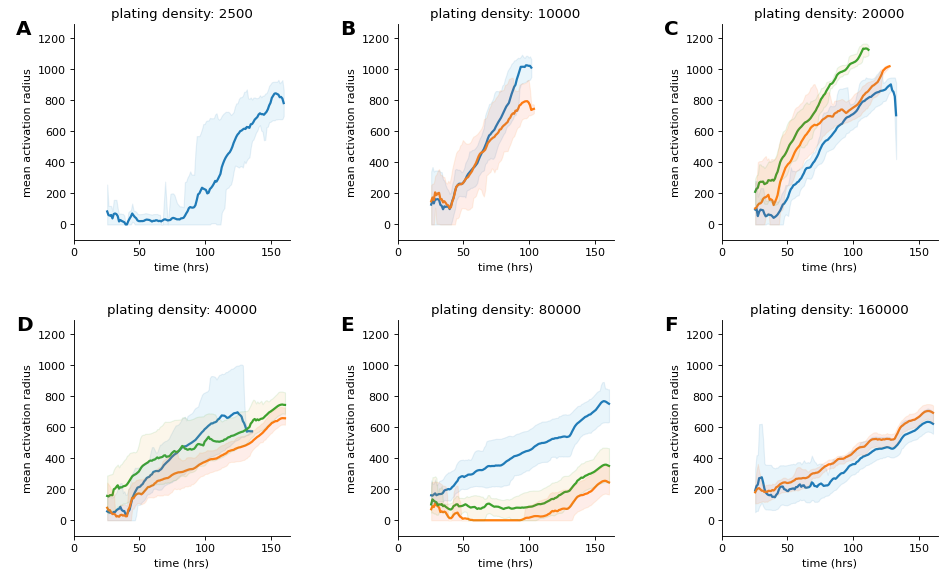

In [328]:
%%capture --no-display

p_dens_vals = np.unique([v[:-2] for v in vids])
p_dens_vals = p_dens_vals[np.argsort([int(v[:-2]) for v in p_dens_vals])]

cycle=hv.Cycle(cc.glasbey_category10)

plots = []
for dens in p_dens_vals:
    plt = hv.Curve(
        data=datawin.loc[datawin["plating density"] == dens, :],
        kdims=["time (hrs)"],
        vdims=["mean radius (px) - windowed", "video"],
    ).groupby(
        "video"
    ).opts(
        xlim=(0, nt+1),
        ylabel="mean activation radius",
        title="plating density: " + dens,
    ).overlay(
    ).opts(
        show_legend=False,
    ).options(
        {"Curve": dict(color=cycle)}
    ) * hv.Area(
        data=datawin.loc[datawin["plating density"] == dens, :],
        kdims=["time (hrs)"],
        vdims=["radius 10th quantile (px) - windowed", "radius 90th quantile (px) - windowed", "video"],
    ).groupby(
        "video"
    ).opts(
        xlim=(0, nt+1),
        ylim=(-100, None),
        alpha=0.1,
    #     title="video",
    ).overlay(
    ).options(
        {"Area": dict(color=cycle)}
    )
    plots.append(plt)

plt=hv.Layout(plots).cols(3)
hv.output(plt, dpi=80)